## Exploratory data analysis for student data

- Developed by Dr. Ngoc L. Tran using student data provided by a representative of the University of California at Merced

- This work is licensed under the Creative Commons Attribution 4.0 International License. 
- To view a copy of this license, visit http://creativecommons.org/licenses/by/4.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

In [1]:
import pandas as pd  
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
filename = 'data/Student Dataset.xlsx'

df = pd.read_excel(filename, header=0)
col_lst = df.columns
df.head()

,ID,Major,HighSchoolGPA,SATScores,AppliedtoanotherUC,AdmittedtoanotherUC,Race,FirstGeneration,Gender,TotalHSHonorsCoursesTaken,MathPlacementScore,FirstMathClassGrade,@1stSemesterGPA,Retained1stYear,Graduated
0,74542,Psychology,3.60,1030,Yes,Yes,Hispanic,Yes,F,6,3,A+,1.0,N,No
1,67208,Undeclared,3.60,740,No,No,Hispanic,Yes,M,13,3,D,1.0,N,No
2,72290,Sociology,3.60,970,Yes,Yes,Hispanic,Yes,F,0,3,F,1.0,N,No
3,76242,Sociology,3.60,860,Yes,Yes,Hispanic,No,M,14,3,F,1.0,N,No
4,196944,Computer Science & Engineering,3.72,690,Yes,Yes,Unknown,Yes,F,0,7,I,1.0,N,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 15 columns):
ID                           2992 non-null int64
Major                        2992 non-null object
HighSchoolGPA                2992 non-null float64
SATScores                    2992 non-null int64
AppliedtoanotherUC           2992 non-null object
AdmittedtoanotherUC          2992 non-null object
Race                         2992 non-null object
FirstGeneration              2992 non-null object
Gender                       2992 non-null object
TotalHSHonorsCoursesTaken    2992 non-null int64
MathPlacementScore           2992 non-null int64
FirstMathClassGrade          2992 non-null object
@1stSemesterGPA              2992 non-null float64
Retained1stYear              2992 non-null object
Graduated                    2992 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 350.8+ KB


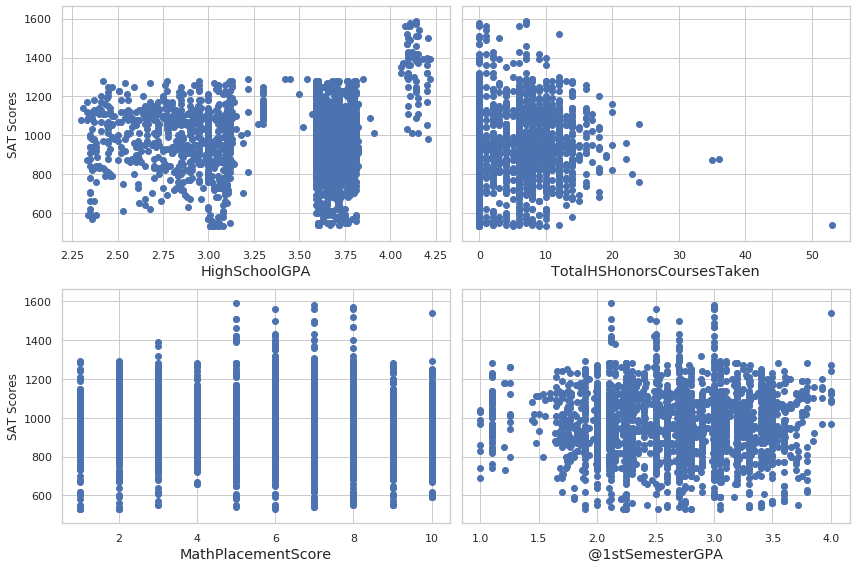

In [4]:
fig, axs = plt.subplots(2,2, figsize=(12,8), sharey=True)

col_lst = ['HighSchoolGPA', 'TotalHSHonorsCoursesTaken', 'MathPlacementScore', '@1stSemesterGPA']
for i, ax in enumerate(axs.flat):
    ax.scatter(df[col_lst[i]], df['SATScores'])
    ax.set_xlabel(col_lst[i], size = 'x-large')
    
    if i % 2 == 0:
        ax.set_ylabel('SAT Scores', size='large')

plt.tight_layout()
# plt.savefig('images/SAT_EDA.png')

In [5]:
# Can high school students really take more than 35 honors courses? It's also a surprise 
# that the students with more than 30 honors courses under their belt did not perform
# particularly well on the SAT.

# Strange that there is a gap in HighSchoolGPA... can't seem to explain it right now.

lst = list(df['HighSchoolGPA'].value_counts())

In [6]:
# Remove sudent 'ID' column since it does not apply to the classification

df.drop(columns='ID', inplace=True)
df.head()

,Major,HighSchoolGPA,SATScores,AppliedtoanotherUC,AdmittedtoanotherUC,Race,FirstGeneration,Gender,TotalHSHonorsCoursesTaken,MathPlacementScore,FirstMathClassGrade,@1stSemesterGPA,Retained1stYear,Graduated
0,Psychology,3.60,1030,Yes,Yes,Hispanic,Yes,F,6,3,A+,1.0,N,No
1,Undeclared,3.60,740,No,No,Hispanic,Yes,M,13,3,D,1.0,N,No
2,Sociology,3.60,970,Yes,Yes,Hispanic,Yes,F,0,3,F,1.0,N,No
3,Sociology,3.60,860,Yes,Yes,Hispanic,No,M,14,3,F,1.0,N,No
4,Computer Science & Engineering,3.72,690,Yes,Yes,Unknown,Yes,F,0,7,I,1.0,N,No


In [7]:
# 'Major' column values have spelling discrepancies.
# 'Management &Business Economics' vs. 'Management & Business Economics'
df['Major'].unique()

# Fix discrepancy
df['Major'].replace('Management &Business Economics', 'Management & Business Economics', inplace=True)

#Check:
# df['Major'].unique()

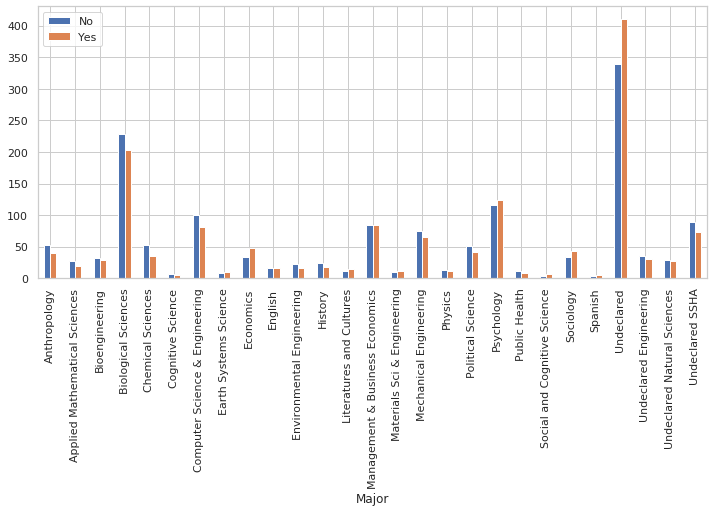

In [8]:
pd.crosstab(df['Major'], df['Graduated']).plot(kind='bar', figsize=(12,5))
plt.legend(loc='upper left')

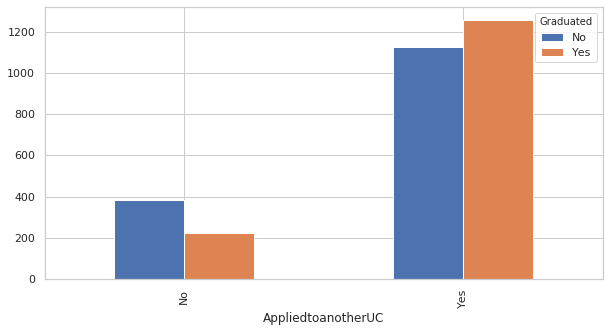

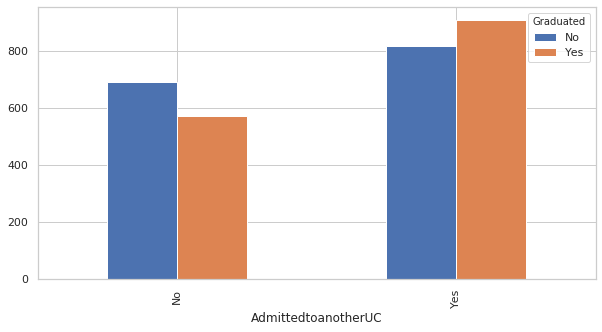

In [9]:
pd.crosstab(df['AppliedtoanotherUC'], df['Graduated']).plot(kind='bar', figsize=(10,5))
pd.crosstab(df['AdmittedtoanotherUC'], df['Graduated']).plot(kind='bar', figsize=(10,5))
# plt.savefig('anotherUC.png')

In [10]:
pd.crosstab(df['Race'], df['Graduated'])

Graduated,No,Yes
Race,,
African-American,75,51
Asian,486,497
Hispanic,433,397
Native American,14,13
Pacific Islander,48,52
Unknown,198,202
White,256,270


In [11]:
pd.crosstab(df['Gender'], df['Graduated'])

Graduated,No,Yes
Gender,,
F,1084,1051
M,426,431


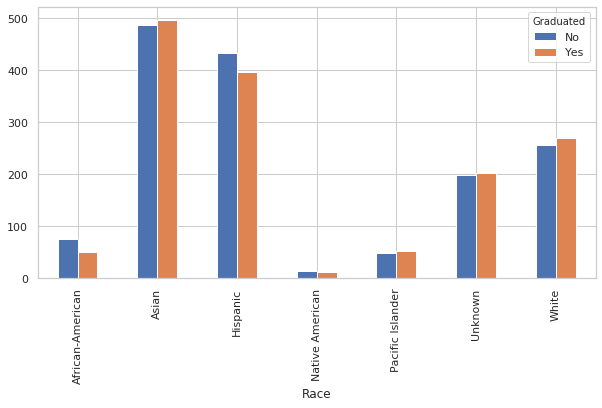

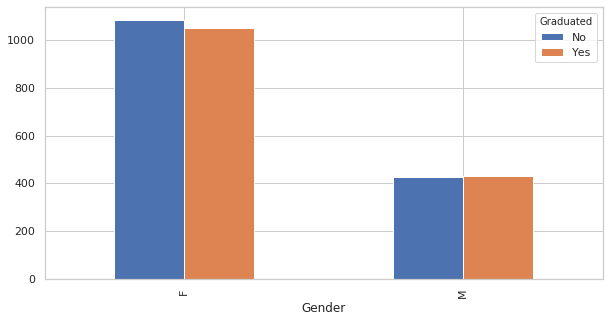

In [12]:
pd.crosstab(df['Race'], df['Graduated']).plot(kind='bar', figsize=(10,5))
pd.crosstab(df['Gender'], df['Graduated']).plot(kind='bar', figsize=(10,5))

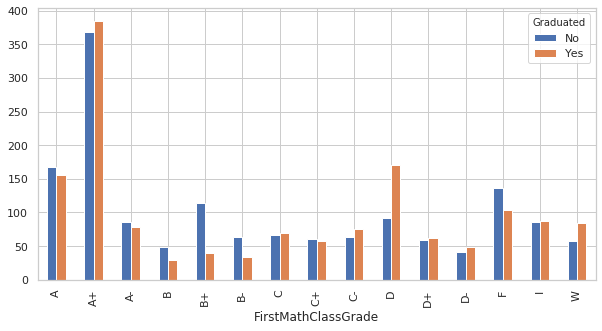

In [13]:
pd.crosstab(df['FirstMathClassGrade'], df['Graduated']).plot(kind='bar', figsize=(10,5))

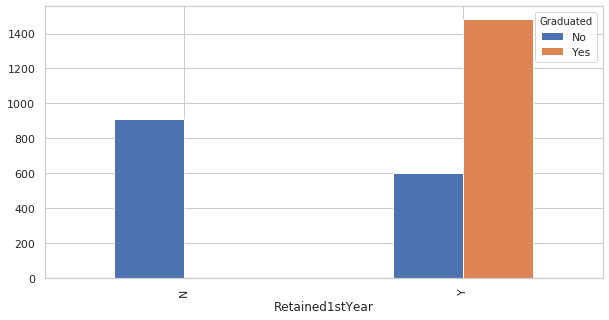

In [14]:
pd.crosstab(df['Retained1stYear'], df['Graduated']).plot(kind='bar', figsize=(10,5))

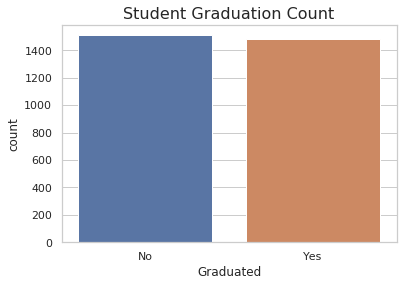

In [15]:
df['Graduated'].value_counts()

sns.countplot(x=df['Graduated'], data=df).set_title('Student Graduation Count', size=16)
sns.set_palette('husl')

# plt.savefig('images/grad_counts.png')

In [16]:
# Interesting. 
# Seems like these features do not have that much bearing on student graduation

df.groupby('Graduated').mean()

,HighSchoolGPA,SATScores,TotalHSHonorsCoursesTaken,MathPlacementScore,@1stSemesterGPA
Graduated,,,,,
No,3.497748,953.582781,4.121192,5.787417,2.582596
Yes,3.421802,986.646424,3.729420,5.459514,2.693370


In [17]:
# Hang on. Will need to convert a number of object type columns to int or float and redo the correlation
# NB: 'Major' and 'Race' columns will need to be one-hot encoded later

# Convert the columns containing values of M/F, Yes/No and Y/N to 
# Yes, Y, M = 1 and No, N, F = 0
# Save all conversions to new a dataframe

df.replace(['Yes', 'Y', 'M', 'No', 'N', 'F'], [1, 1, 1, 0, 0, 0], inplace=True)
df.head()

,Major,HighSchoolGPA,SATScores,AppliedtoanotherUC,AdmittedtoanotherUC,Race,FirstGeneration,Gender,TotalHSHonorsCoursesTaken,MathPlacementScore,FirstMathClassGrade,@1stSemesterGPA,Retained1stYear,Graduated
0,Psychology,3.60,1030,1,1,Hispanic,1,0,6,3,A+,1.0,0,0
1,Undeclared,3.60,740,0,0,Hispanic,1,1,13,3,D,1.0,0,0
2,Sociology,3.60,970,1,1,Hispanic,1,0,0,3,0,1.0,0,0
3,Sociology,3.60,860,1,1,Hispanic,0,1,14,3,0,1.0,0,0
4,Computer Science & Engineering,3.72,690,1,1,Unknown,1,0,0,7,I,1.0,0,0


In [18]:
df.groupby('Race').mean()

,HighSchoolGPA,SATScores,AppliedtoanotherUC,AdmittedtoanotherUC,FirstGeneration,Gender,TotalHSHonorsCoursesTaken,MathPlacementScore,@1stSemesterGPA,Retained1stYear,Graduated
Race,,,,,,,,,,,
African-American,3.546984,882.460317,1.000000,0.166667,0.515873,0.261905,3.785714,6.634921,2.749881,0.825397,0.404762
Asian,3.410051,972.716175,0.771109,0.573754,0.406918,0.330621,3.350966,5.549339,2.755107,0.700916,0.505595
Hispanic,3.502518,958.349398,0.795181,0.627711,0.528916,0.263855,4.577108,5.481928,2.635669,0.683133,0.478313
Native American,3.506296,877.037037,0.592593,0.518519,0.444444,0.333333,5.888889,5.407407,2.767037,0.740741,0.481481
Pacific Islander,3.520400,996.300000,0.780000,0.640000,0.440000,0.260000,3.520000,5.600000,2.529500,0.700000,0.520000
Unknown,3.469250,965.650000,0.762500,0.597500,0.547500,0.297500,4.027500,5.527500,2.498700,0.680000,0.505000
White,3.445266,1007.129278,0.836502,0.579848,0.458175,0.239544,3.912548,5.840304,2.512918,0.682510,0.513308


In [19]:
df.groupby('Major').mean()

,HighSchoolGPA,SATScores,AppliedtoanotherUC,AdmittedtoanotherUC,FirstGeneration,Gender,TotalHSHonorsCoursesTaken,MathPlacementScore,@1stSemesterGPA,Retained1stYear,Graduated
Major,,,,,,,,,,,
Anthropology,3.655652,927.826087,0.804348,0.565217,0.489130,0.260870,4.010870,6.315217,2.941087,0.684783,0.434783
Applied Mathematical Sciences,3.589167,955.208333,0.812500,0.666667,0.437500,0.208333,3.354167,5.687500,2.553958,0.645833,0.416667
Bioengineering,3.415246,936.393443,0.836066,0.622951,0.524590,0.196721,3.573770,5.868852,2.614590,0.639344,0.475410
Biological Sciences,3.454596,950.739030,0.769053,0.570439,0.464203,0.281755,3.863741,5.542725,2.614700,0.658199,0.471132
Chemical Sciences,3.521477,963.522727,0.875000,0.568182,0.522727,0.227273,3.409091,5.511364,2.641364,0.613636,0.397727
Cognitive Science,3.585385,973.076923,0.923077,0.846154,0.384615,0.461538,8.000000,5.769231,2.639231,0.692308,0.461538
Computer Science & Engineering,3.568736,977.802198,0.774725,0.582418,0.483516,0.280220,4.593407,5.857143,2.680495,0.659341,0.450549
Earth Systems Science,3.397222,986.666667,0.833333,0.555556,0.500000,0.222222,3.055556,5.666667,2.518889,0.777778,0.555556
Economics,3.604074,957.283951,0.802469,0.629630,0.506173,0.160494,3.567901,5.679012,2.740864,0.691358,0.592593


In [20]:
# Make a generalized plot of actual graduation data versus HS GPA and SAT
sub_df = np.array(df[['HighSchoolGPA', 'SATScores', 'Graduated']])
X = sub_df[:, :-1]
y = sub_df[:,-1]

# Filter according to graduated Yes/No
g_yes = sub_df[y==1]
g_no = sub_df[y==0]
g_yes.shape, g_no.shape, X.shape, y.shape

((1482, 3), (1510, 3), (2992, 2), (2992,))

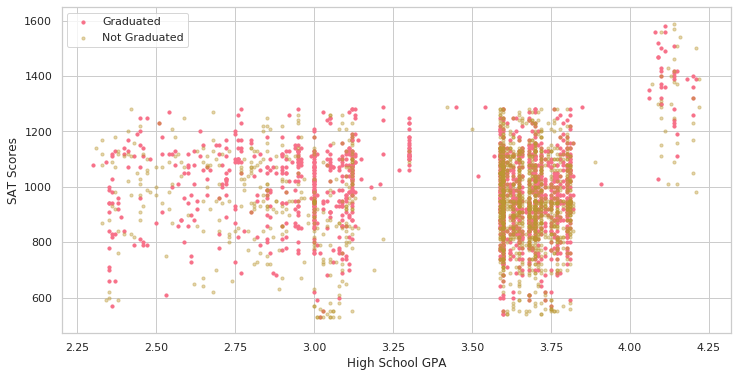

In [21]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(g_yes[:, 0], g_yes[:, 1], s=10, label='Graduated')
ax.scatter(g_no[:, 0], g_no[:, 1], s=10, label='Not Graduated', alpha = 0.4, marker = 'o')

ax.set_xlabel('High School GPA')
ax.set_ylabel('SAT Scores')
ax.legend()

plt.show()
# plt.savefig('GPA_SAT_Grad.png')

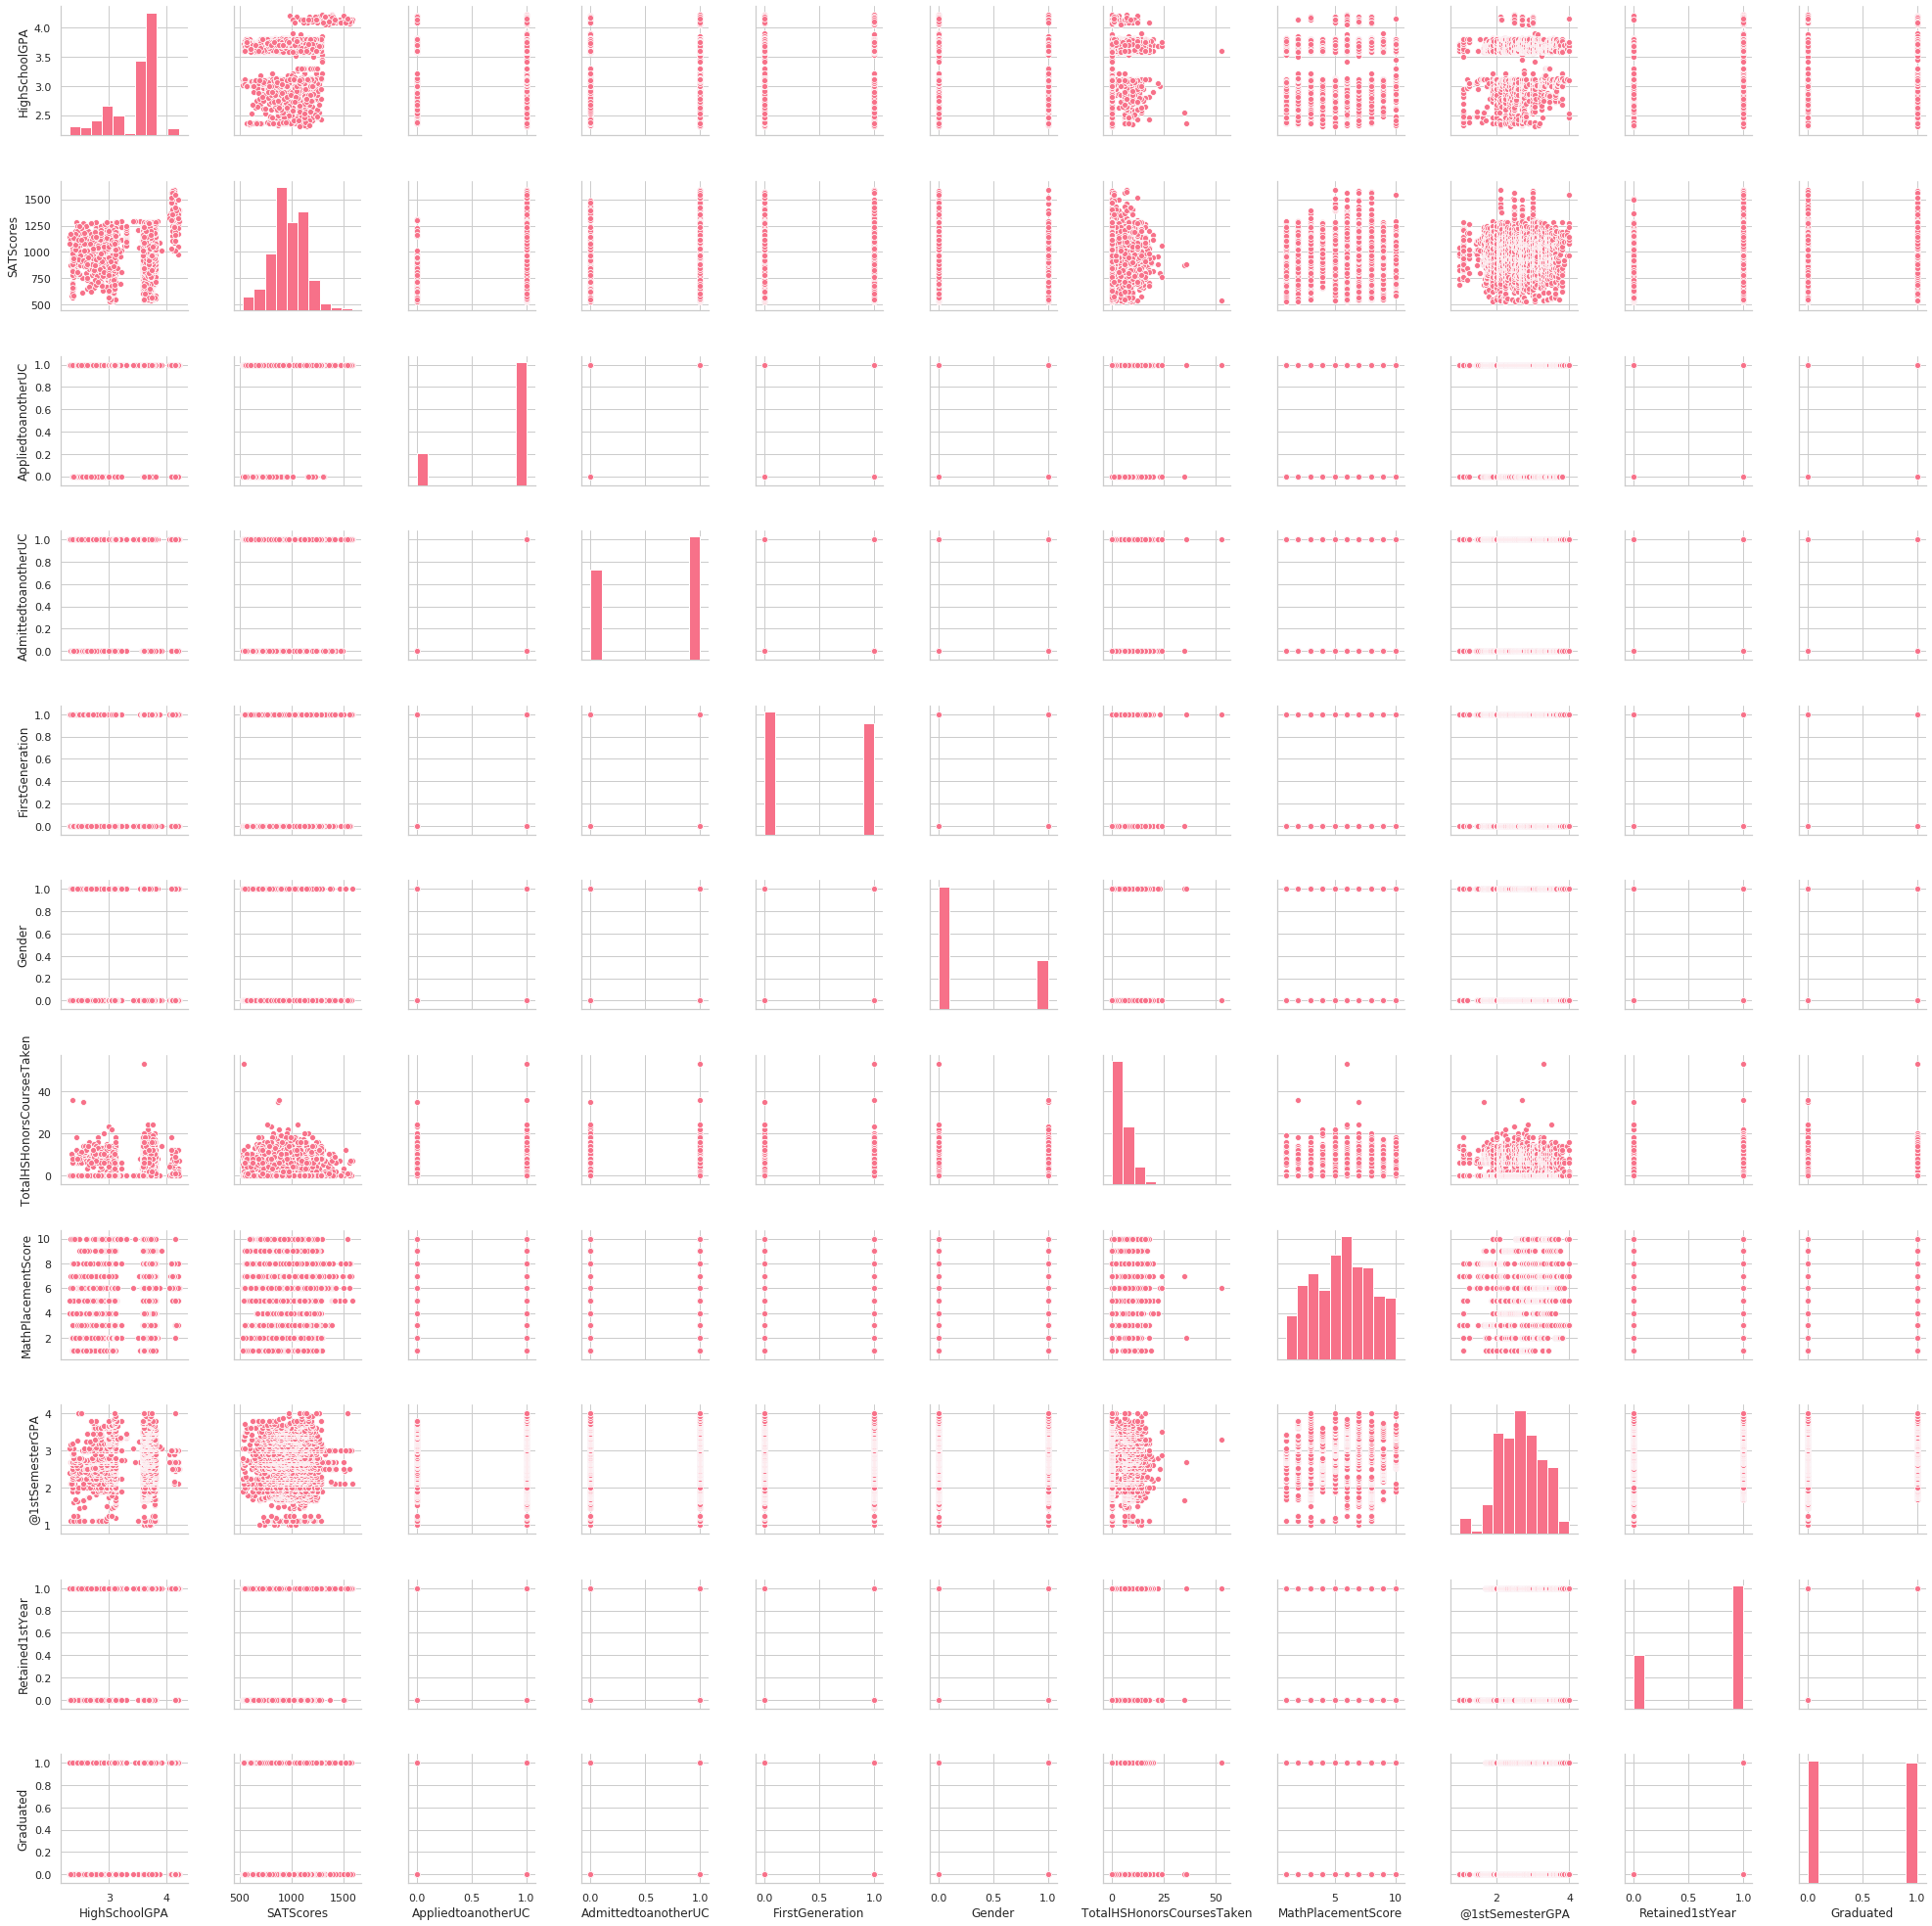

In [22]:
sns.pairplot(df)

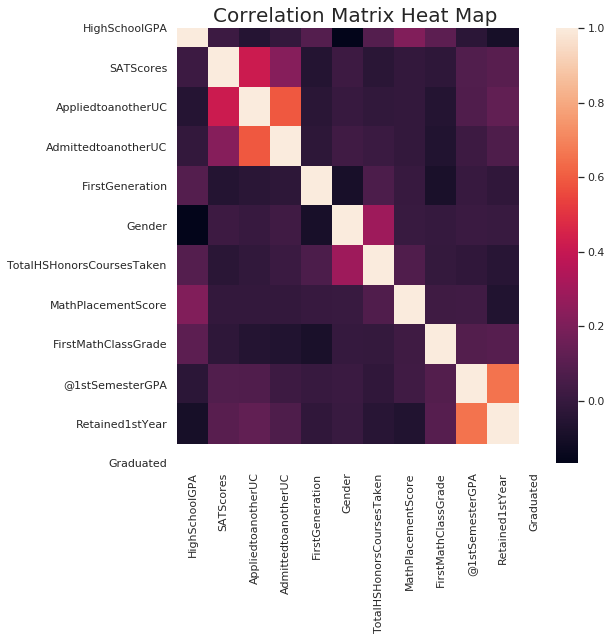

In [23]:
df.replace(['Yes', 'Y', 'M', 'No', 'N', 'F'], [1, 1, 1, 0, 0, 0], inplace=True)
df.head()

corr = df.drop(columns=['Major', 'Race']).corr()
fig, ax = plt.subplots(figsize=(8,8))

ax = sns.heatmap(corr, 
            xticklabels=df.drop(columns=['Major', 'Race']).columns.values,
            yticklabels=df.drop(columns=['Major', 'Race']).columns.values).set_title('Correlation Matrix Heat Map', size=20)

# plt.savefig('corr_heat_map.png')

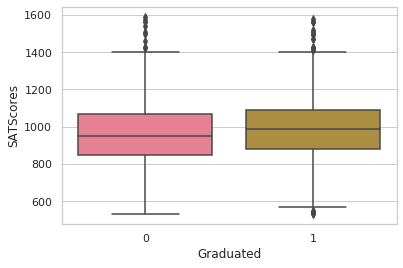

In [24]:
# MAKE A BOXPLOT OF Graduated versus SAT Scores
sns.boxplot(x='Graduated', y='SATScores', data=df)

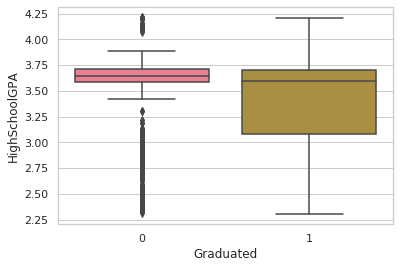

In [25]:
# MAKE A BOXPLOT OF Graduated versus High school GPA
sns.boxplot(x='Graduated', y='HighSchoolGPA', data=df)

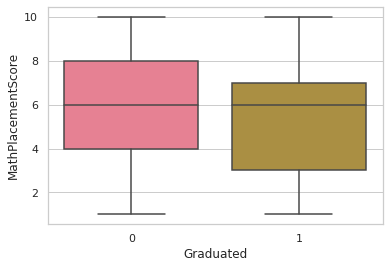

In [26]:
# MAKE A BOXPLOT OF Graduated versus Math Placement Score
sns.boxplot(x='Graduated', y='MathPlacementScore', data=df)

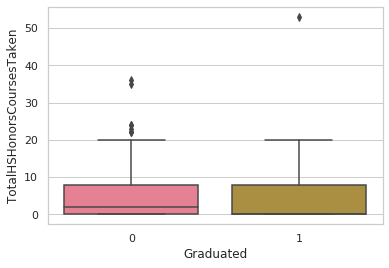

In [27]:
# MAKE A BOXPLOT OF Graduated versus SAT Scores
sns.boxplot(x='Graduated', y='TotalHSHonorsCoursesTaken', data=df)

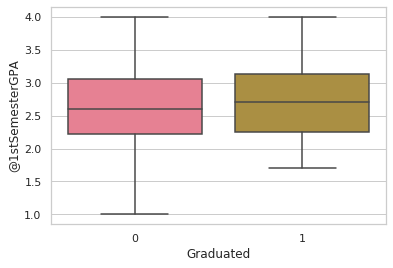

In [28]:
# MAKE A BOXPLOT OF Graduated versus SAT Scores
sns.boxplot(x='Graduated', y='@1stSemesterGPA', data=df)